# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import requests
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# In case you change unix timestamp
from datetime import datetime
from pytz import timezone

# Looking up for city names with geo-coordinates 
from citipy import citipy

# API keys
from api_keys import w_key
from api_keys import g_key

# Range of Latitude and Longitude
lat_r = (-90, 90)
lng_r = (-180, 180)

## Generate Cities List

In [6]:
# Do not Run

In [65]:
# Empty list for Latitude and Longitude and cities
lat_lng = []
c_list = []

# Random set of Latitude and Longitude / size number must be modify according to confirmed cities
lat = np.random.uniform(lat_r[0], lat_r[1], size = 1500)
lng = np.random.uniform(lng_r[0], lng_r[1], size = 1400)
lat_lng = zip(lat,lng)

# Using Citipy for looking the nearest city using lat_lng
for lat_lng in lat_lng:
    c = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    # Conditional for identifying unique city and append for adding in c_list 
    if c not in c_list:
            c_list.append(c)

# Number of cities in c_list to be confirmed
len(c_list)

587

In [66]:
# Cities DataFrame
city_data = pd.DataFrame({'City': c_list})

# Output
city_data.to_csv('Output_Data/Cities_List.csv', index=False, header=True)
city_data.head()

,City
0,cape town
1,tsihombe
2,port alfred
3,lompoc
4,egvekinot


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Do not Run

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

In [67]:
# Setting URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={w_key}&units={units}&q="

In [68]:
# Set up lists to hold reponse info
city = []
lt = []
lg = []
m_temp = []
humidity = []
cloudiness = []
w_speed = []
country = []
date = []
n_found = []
# Record count and set count
r_c = 0
s_c = 1


# Loop through the list of cities and perform a request for data on each
for c in c_list:
    try:
        response = requests.get(query_url + c).json()
        city.append(response['name'])
        lt.append(response['coord']['lat'])
        lg.append(response['coord']['lon'])
        m_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        w_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print (f'Processing Record {r_c} of Set {s_c} | {c}')
        r_c = r_c +1
        if r_c == 50:
            r_c = 0 
            s_c = s_c +1
    except KeyError:
        print (f'City {c} not found. Skipping...')
        n_found.append(c)
print ('------------------------')        
print ('Data Retrieval Complete')
print ('------------------------')


Processing Record 0 of Set 1 | cape town
City tsihombe not found. Skipping...
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | egvekinot
Processing Record 4 of Set 1 | rocha
Processing Record 5 of Set 1 | svetlogorsk
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | mmabatho
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kaitong
City mys shmidta not found. Skipping...
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | matay
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | yakeshi
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | buchanan
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | 

Processing Record 34 of Set 4 | lensk
Processing Record 35 of Set 4 | cidreira
Processing Record 36 of Set 4 | lamar
Processing Record 37 of Set 4 | morro da fumaca
Processing Record 38 of Set 4 | christchurch
Processing Record 39 of Set 4 | toccoa
Processing Record 40 of Set 4 | kapit
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | canaries
City sataua not found. Skipping...
Processing Record 43 of Set 4 | iskateley
Processing Record 44 of Set 4 | igarka
Processing Record 45 of Set 4 | uribia
Processing Record 46 of Set 4 | villarrica
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | tuatapere
City louisbourg not found. Skipping...
Processing Record 49 of Set 4 | bogatynia
Processing Record 0 of Set 5 | beaune
Processing Record 1 of Set 5 | taksimo
Processing Record 2 of Set 5 | saint-francois
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | la palma
Processing Record 5 of Set 5 | pokrovsk
Processing Record 6 of Set 5 

Processing Record 17 of Set 8 | itupiranga
Processing Record 18 of Set 8 | alyangula
Processing Record 19 of Set 8 | xichang
Processing Record 20 of Set 8 | tulun
Processing Record 21 of Set 8 | portland
Processing Record 22 of Set 8 | san isidro
Processing Record 23 of Set 8 | yinchuan
Processing Record 24 of Set 8 | salinas
Processing Record 25 of Set 8 | lumsden
Processing Record 26 of Set 8 | nouadhibou
City cockburn harbour not found. Skipping...
Processing Record 27 of Set 8 | san cristobal
Processing Record 28 of Set 8 | ambon
Processing Record 29 of Set 8 | salinopolis
Processing Record 30 of Set 8 | boa vista
Processing Record 31 of Set 8 | olavarria
Processing Record 32 of Set 8 | ewa beach
Processing Record 33 of Set 8 | kathu
Processing Record 34 of Set 8 | kaduy
Processing Record 35 of Set 8 | adrar
Processing Record 36 of Set 8 | paciran
Processing Record 37 of Set 8 | mindelo
Processing Record 38 of Set 8 | imbituba
Processing Record 39 of Set 8 | luena
Processing Record

In [69]:
# Total amount of cities
t_city=len(city)
t_city = pd.DataFrame({'Total Count of Cities': t_city}, index=[0])
t_city

,Total Count of Cities
0,538


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Do not run 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [70]:
c_df =pd.DataFrame({'City': city,
                    'Lat': lt,
                    'Lng':lg,
                    'Max Temp (C)':m_temp,
                    'Humidity (%)':humidity,
                    'Cloudiness (%)':cloudiness,
                    'Wind Speed':w_speed,
                    'Country':country,
                    'Date':date})
c_df.head()

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,14.33,77,45,2.45,ZA,1621995094
1,Port Alfred,-33.5906,26.8910,16.82,89,45,5.22,ZA,1621995376
2,Lompoc,34.6391,-120.4579,14.78,76,20,14.31,US,1621995155
3,Egvekinot,66.3167,-179.1667,4.45,71,99,4.56,RU,1621995376
4,Rocha,-34.4833,-54.3333,7.09,76,5,2.34,UY,1621995086


In [71]:
# Finding duplicates
duplicates = c_df.loc[c_df.duplicated(subset=['City','Lat'], keep=False),c_df.columns]
duplicates

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed,Country,Date


In [72]:
# Output
c_df.to_csv('Output_Data/City_Data.csv', index=False, header=True)

In [16]:
# Do not run 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [73]:
c_df.describe()

,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,19.474053,19.553107,17.516691,68.698885,58.739777,3.475093,1.621995e+09
std,33.926510,91.846941,9.129196,20.991052,40.108827,2.440516,8.421518e+01
min,-54.800000,-179.166700,-7.740000,1.000000,0.000000,0.000000,1.621995e+09
25%,-9.060275,-60.121050,10.547500,58.000000,16.000000,1.782500,1.621995e+09
50%,23.358150,25.598550,18.295000,72.500000,75.000000,2.845000,1.621995e+09
75%,48.557925,106.327250,25.207500,85.000000,99.000000,4.597500,1.621995e+09
max,78.218600,179.316700,37.830000,100.000000,100.000000,18.380000,1.621996e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [74]:
# Inspect the data and remove the cities where the humidity > 100%
humidity_max = c_df['Humidity (%)'].max()
humidity_max

100

In [75]:
#  Get the indices of cities that have humidity over 100%.
if humidity_max <=100:
    print(f'There are no cities with humidity over 100%')

There are no cities with humidity over 100%


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [76]:
# Establishing outliers
q_25 = np.quantile(c_df['Humidity (%)'],0.25)
q_50 = np.quantile(c_df['Humidity (%)'],0.50)
q_75 = np.quantile(c_df['Humidity (%)'],0.75)

# Defining IQR, lower and upper bound
iqr = q_75 - q_25
lower_bound = q_25 - (1.5 * iqr)
upper_bound = q_75 + (1.5 * iqr)

outliers = []
o_c = 0

for index, row in c_df.iterrows():
    if row['Humidity (%)'] < lower_bound or row['Humidity (%)'] > upper_bound:
        o_c = o_c + 1
        outliers.append(row['Humidity (%)'])

# Printing outliers
print (f'There are {o_c} outliers.')
print (f'The outliers: {outliers}')

There are 16 outliers.
The outliers: [13, 16, 4, 1, 10, 9, 14, 13, 16, 9, 12, 8, 16, 10, 12, 12]


In [77]:
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = c_df.drop(c_df[(c_df['Humidity (%)']< lower_bound)|(c_df['Humidity (%)']> upper_bound)].index, inplace=False)
clean_city_df

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,14.33,77,45,2.45,ZA,1621995094
1,Port Alfred,-33.5906,26.8910,16.82,89,45,5.22,ZA,1621995376
2,Lompoc,34.6391,-120.4579,14.78,76,20,14.31,US,1621995155
3,Egvekinot,66.3167,-179.1667,4.45,71,99,4.56,RU,1621995376
4,Rocha,-34.4833,-54.3333,7.09,76,5,2.34,UY,1621995086
...,...,...,...,...,...,...,...,...,...
533,Edd,13.9297,41.6925,30.41,63,7,1.54,ER,1621995536
534,Bairiki Village,1.3292,172.9752,31.00,70,20,6.18,KI,1621995536
535,Syumsi,57.1111,51.6149,9.63,91,5,1.94,RU,1621995537
536,Taldan,53.6667,124.8000,3.65,96,100,2.37,RU,1621995537


In [78]:
# Output
clean_city_df.to_csv('Output_Data/Clean_City_Data.csv', index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

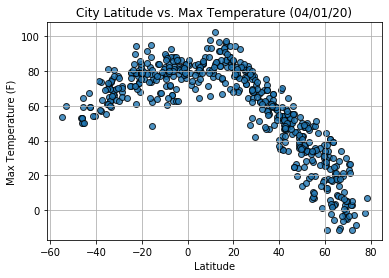

In [10]:
# Do not run

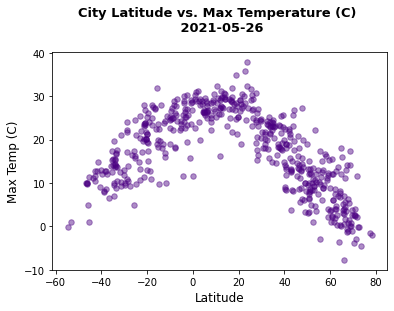

In [114]:
fig1,ax1=plt.subplots()
plt.scatter(clean_city_df['Lat'], clean_city_df['Max Temp (C)'], color = 'indigo', s = 30, alpha = 0.450)
# plt.xticks(np.arange(-90, 90, 30))
date = datetime.utcfromtimestamp(int(clean_city_df['Date'][0])).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Max Temperature (C) \n {date}\n', fontsize = 13, fontweight = 'bold')
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temp (C)', fontsize = 12)
plt.savefig('Images/City_Latitude_vs_Max_Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

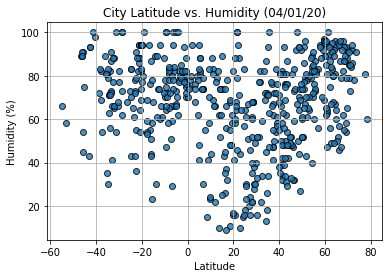

In [11]:
# Do not run

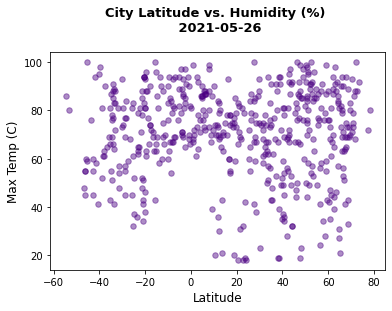

In [115]:
fig1,ax1=plt.subplots()
plt.scatter(clean_city_df['Lat'], clean_city_df['Humidity (%)'], color = 'indigo', s = 30, alpha = 0.450)
date = datetime.utcfromtimestamp(int(clean_city_df['Date'][0])).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Humidity (%) \n {date}\n', fontsize = 13, fontweight = 'bold')
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temp (C)', fontsize = 12)
plt.savefig('Images/City_Latitude_vs_Cloudiness.png')
plt.show()

## Latitude vs. Cloudiness Plot

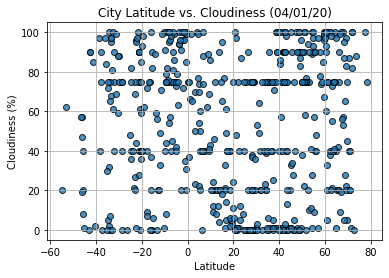

In [12]:
# Do not run

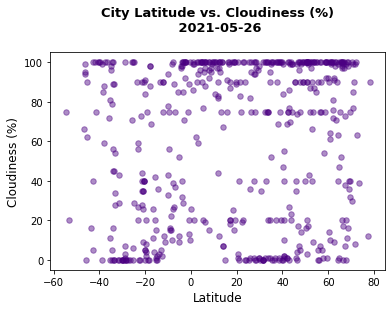

In [116]:
fig1,ax1=plt.subplots()
plt.scatter(clean_city_df['Lat'], clean_city_df['Cloudiness (%)'], color = 'indigo', s = 30, alpha = 0.450)
date = datetime.utcfromtimestamp(int(clean_city_df['Date'][0])).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Cloudiness (%)\n {date}\n', fontsize = 13, fontweight = 'bold')
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)
plt.savefig('Images/City Latitude_vs_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

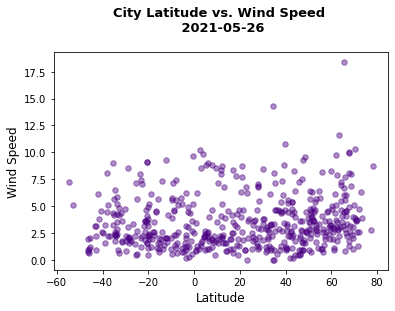

In [117]:
fig1,ax1=plt.subplots()
plt.scatter(clean_city_df['Lat'], clean_city_df['Wind Speed'], color = 'indigo', s = 30, alpha = 0.450)
date = datetime.utcfromtimestamp(int(clean_city_df['Date'][0])).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs. Wind Speed \n {date}\n', fontsize = 13, fontweight = 'bold')
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed', fontsize = 12)
plt.savefig('Images/City_Latitude_vs_Wind Speed.png')
plt.show()

## Linear Regression

In [163]:
#
def linear_regression(x_axis, y_axis,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    rv = x_axis * slope + intercept
    le = 'y = ' + str(round(slope,2)) + 'x + ' +str(round(intercept,2))
    fig1,ax1=plt.subplots()
    plt.scatter(x_axis, y_axis, color = 'indigo', s = 30, alpha = 0.450)
    plt.plot(x_axis,rv, 'r-.',linewidth =1.2, color = 'dimgray')
    plt.annotate(le, (0,10), fontsize = 10 , color = 'dimgray',fontweight = 'bold')
    plt.annotate(f'r^2= {round(rvalue**2,2)}',(0,5),fontsize=10,color="dimgray", fontweight='bold')

In [139]:
# Selectin Northern Hemisphere
north_hems = clean_city_df.loc[clean_city_df['Lat']>0,:]
north_hems

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
2,Lompoc,34.6391,-120.4579,14.78,76,20,14.31,US,1621995155
3,Egvekinot,66.3167,-179.1667,4.45,71,99,4.56,RU,1621995376
5,Forsytheganj,52.6333,29.7333,13.40,91,97,5.34,BY,1621995376
6,Albany,42.6001,-73.9662,21.25,69,100,2.14,US,1621995377
14,Maţāy,28.4190,30.7792,23.20,38,0,5.50,EG,1621995379
...,...,...,...,...,...,...,...,...,...
532,Yerofey Pavlovich,53.9667,121.9667,10.28,63,100,1.09,RU,1621995536
533,Edd,13.9297,41.6925,30.41,63,7,1.54,ER,1621995536
534,Bairiki Village,1.3292,172.9752,31.00,70,20,6.18,KI,1621995536
535,Syumsi,57.1111,51.6149,9.63,91,5,1.94,RU,1621995537


In [137]:
south_hems = clean_city_df.loc[clean_city_df['Lat']<0,:]
south_hems 

,City,Lat,Lng,Max Temp (C),Humidity (%),Cloudiness (%),Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,14.33,77,45,2.45,ZA,1621995094
1,Port Alfred,-33.5906,26.8910,16.82,89,45,5.22,ZA,1621995376
4,Rocha,-34.4833,-54.3333,7.09,76,5,2.34,UY,1621995086
7,Rikitea,-23.1203,-134.9692,25.38,79,56,7.42,PF,1621995256
8,Ushuaia,-54.8000,-68.3000,-0.19,86,75,7.20,AR,1621995377
...,...,...,...,...,...,...,...,...,...
507,Poconé,-16.2567,-56.6228,22.37,63,4,1.07,BR,1621995451
518,Alice Springs,-23.7000,133.8833,14.75,36,90,7.98,AU,1621995401
519,Coyhaique,-45.5752,-72.0662,0.97,100,90,2.06,CL,1621995485
522,Ikwiriri,-7.9562,38.9716,18.02,93,100,1.12,TZ,1621995532


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


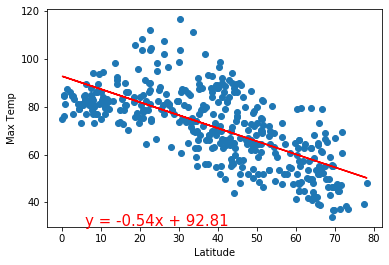

In [25]:
# Do not run

The r-value is: 0.75


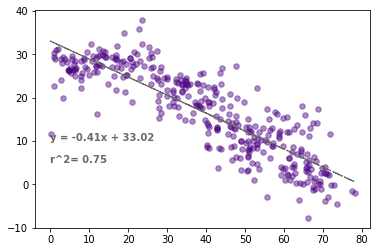

In [164]:
linear_regression(north_hems['Lat'], north_hems['Max Temp (C)'],30,70)
print (f'The r-value is: {round(rvalue**2,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.75


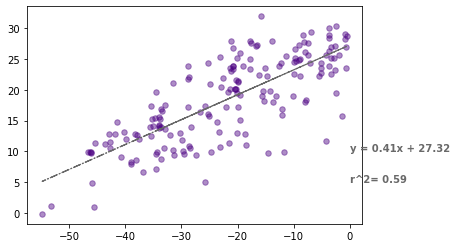

In [165]:
linear_regression(south_hems['Lat'], south_hems['Max Temp (C)'],30,70)
print (f'The r-value is: {round(rvalue**2,2)}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


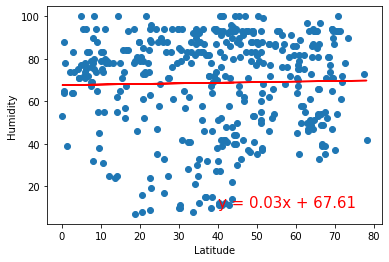

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


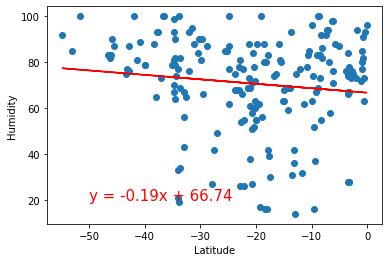

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


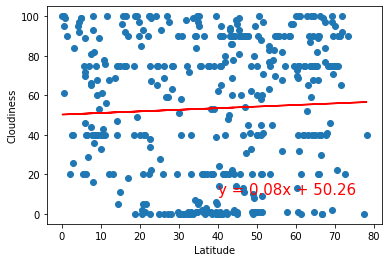

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


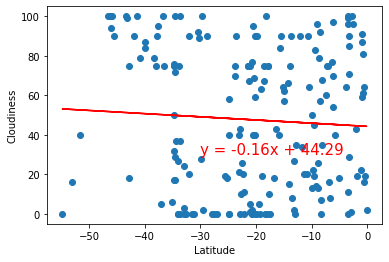

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


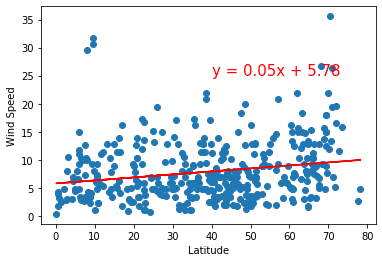

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


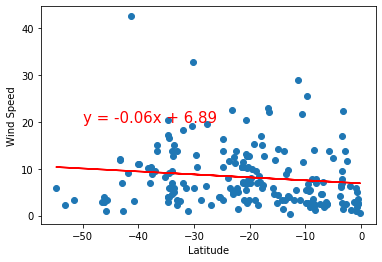